## Given unknown, undescribed data set predict traget class 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from functions.LoadingData import LoadData

### Import data using self-created module

In [2]:
data = LoadData('Colab Notebooks/KNN_Project_Data')

### Present basic statistics about the data using self-created module

Shape of DataFrame is (1000, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   XVPM          1000 non-null   float64
 1   GWYH          1000 non-null   float64
 2   TRAT          1000 non-null   float64
 3   TLLZ          1000 non-null   float64
 4   IGGA          1000 non-null   float64
 5   HYKR          1000 non-null   float64
 6   EDFS          1000 non-null   float64
 7   GUUB          1000 non-null   float64
 8   MGJM          1000 non-null   float64
 9   JHZC          1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


None


Head of DataFrame:


,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0



Dataset statistics:


,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1055.071157,991.851567,1529.373525,495.107156,940.590072,1550.637455,1561.003252,561.346117,1089.067338,1452.521629,0.50000
std,370.980193,392.278890,640.286092,142.789188,345.923136,493.491988,598.608517,247.357552,402.666953,568.132005,0.50025
min,21.170000,21.720000,31.800000,8.450000,17.930000,27.930000,31.960000,13.520000,23.210000,30.890000,0.00000
25%,767.413366,694.859326,1062.600806,401.788135,700.763295,1219.267077,1132.097865,381.704293,801.849802,1059.499689,0.00000
50%,1045.904805,978.355081,1522.507269,500.197421,939.348662,1564.996551,1565.882879,540.420379,1099.087954,1441.554053,0.50000
75%,1326.065178,1275.528770,1991.128626,600.525709,1182.578166,1891.937040,1981.739411,725.762027,1369.923665,1864.405512,1.00000
max,2117.000000,2172.000000,3180.000000,845.000000,1793.000000,2793.000000,3196.000000,1352.000000,2321.000000,3089.000000,1.00000



Number of NaN values in DataFrame:


XVPM            0
GWYH            0
TRAT            0
TLLZ            0
IGGA            0
HYKR            0
EDFS            0
GUUB            0
MGJM            0
JHZC            0
TARGET CLASS    0
dtype: int64


Number of duplicates in DataFrame:


0


Visualisation of missing values in data set:


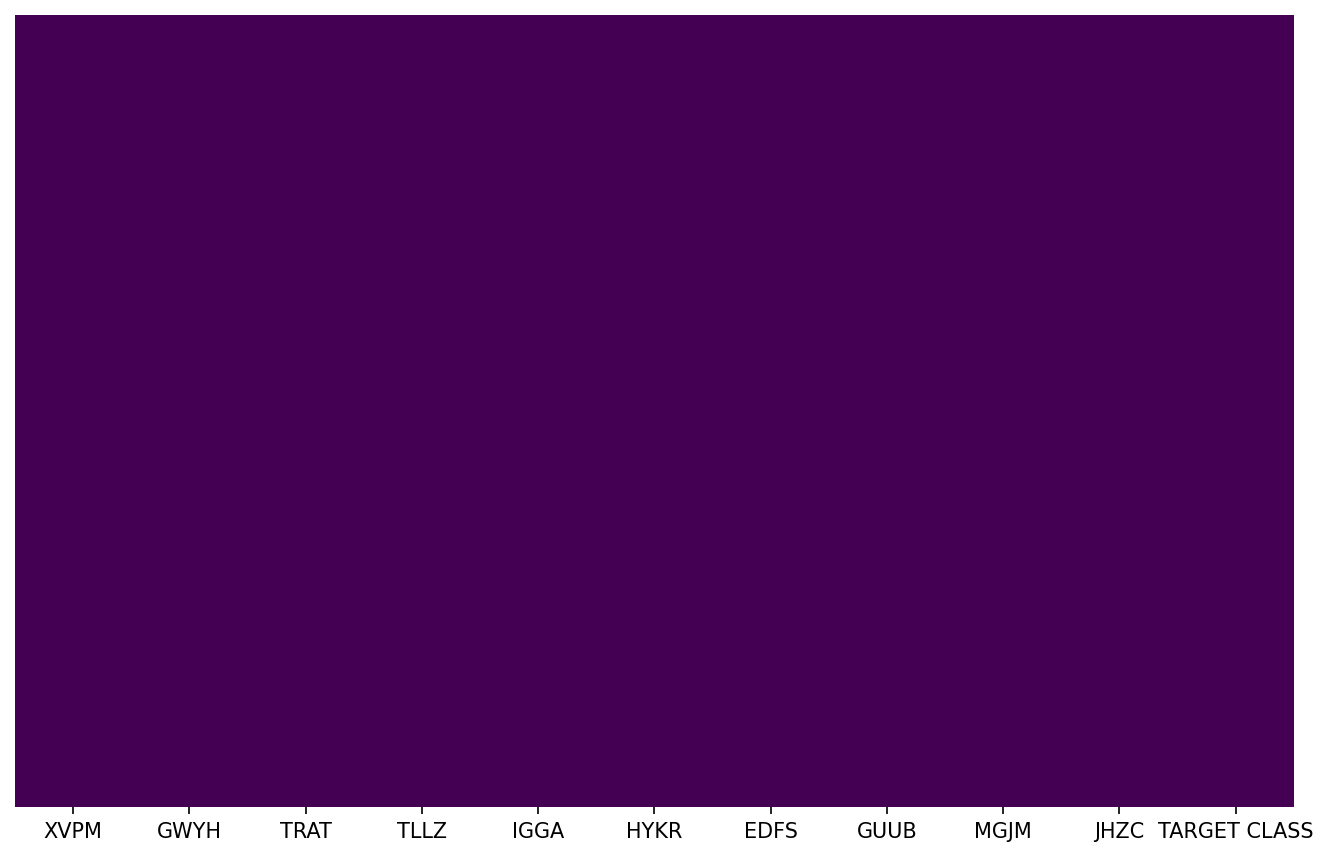

In [3]:
knn_unk = data.create_data()

### One describing pairplot

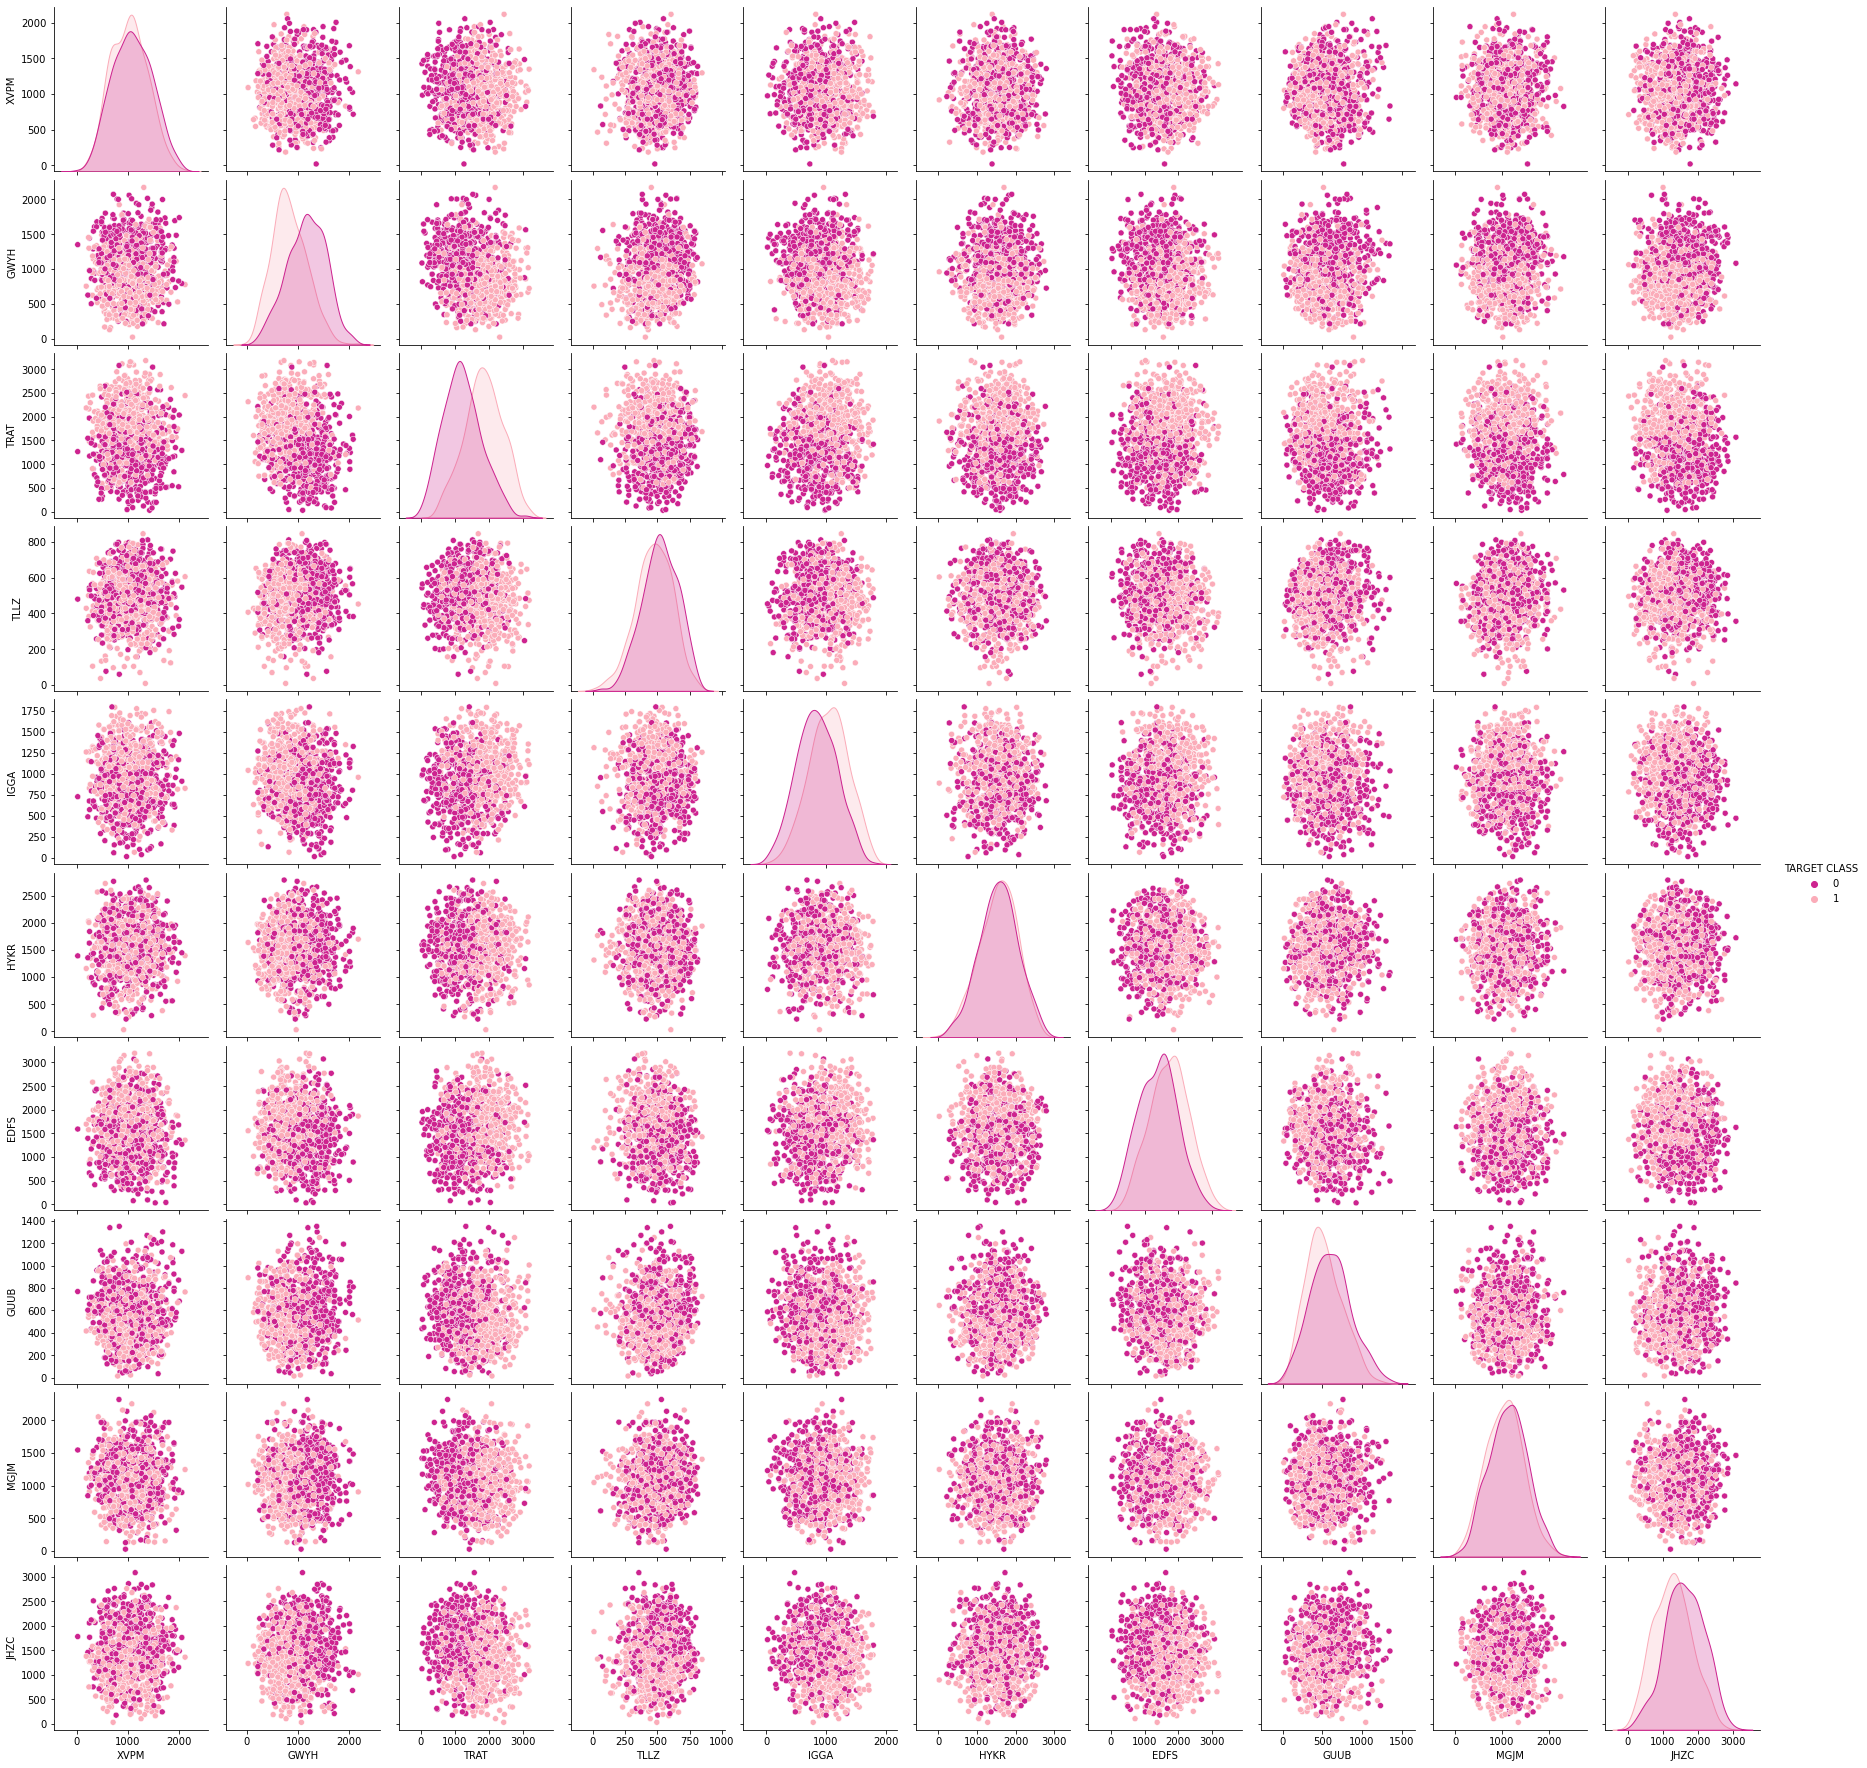

In [4]:
sns.pairplot(knn_unk, palette='RdPu_r', hue='TARGET CLASS')

### Scaling the data

In [5]:
scale = StandardScaler()

In [6]:
scale.fit(knn_unk.drop('TARGET CLASS',axis=1))

StandardScaler()

In [7]:
scaled_data = scale.transform(knn_unk.drop('TARGET CLASS',axis=1))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data,
                                                    knn_unk['TARGET CLASS'],
                                                    test_size=0.3,
                                                    random_state=42)

### Evaluate best performing model

In [9]:
error = []

for i in range(1,60):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    predicted = knn.predict(X_test)
    error.append(np.mean(predicted != y_test))

Text(0.5, 1.0, 'Error against K Value')

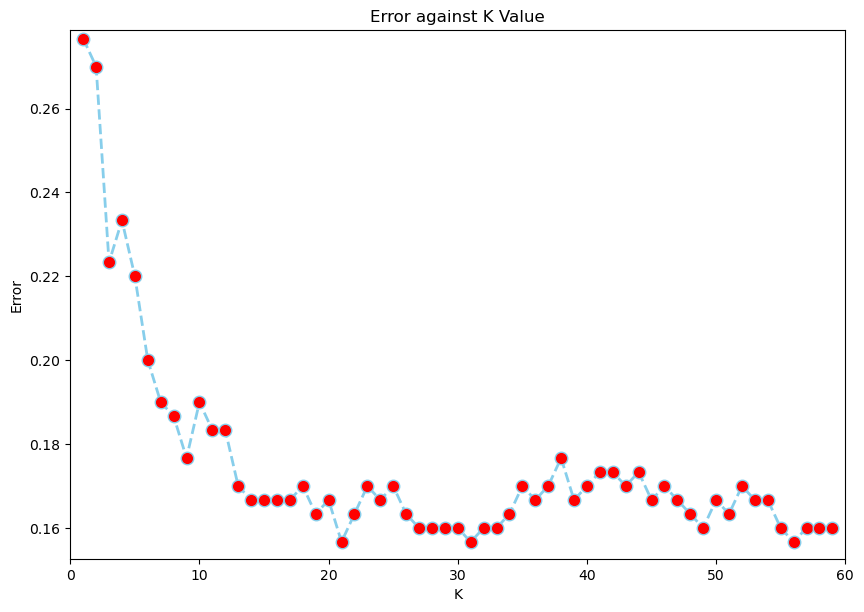

In [10]:
plt.figure(figsize=(10,7), dpi=100)

plt.plot(range(1,60), error,
         'skyblue',
         linestyle='--',
         linewidth=2,
         marker='o',
         markersize=9,
         markerfacecolor='red')
plt.xlabel('K')
plt.ylabel('Error')
plt.xlim((0,60))
plt.ylim((min(error)-0.004, max(error)+0.002))
plt.title('Error against K Value')

As we can see on the plot lowest errors are around 21, 31, 57. We are going to use 21 because it is going to be the most efficient.

In [11]:
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train, y_train)
predicted = knn.predict(X_test)

### Evaluate model's performance

In [12]:
confusion_matrix(y_test, predicted)

array([[125,  21],
       [ 26, 128]], dtype=int64)

In [13]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       146
           1       0.86      0.83      0.84       154

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



The accuracy of our model is 84%, it is pretty good score for completely unknown data